In [1]:
import os
import glob
import numpy as np
import cv2
from sklearn.utils import shuffle
import time
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import dataset11
from sklearn.metrics import confusion_matrix
from datetime import timedelta
%matplotlib inline

/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [47]:
# Convolutional Layer 1.
filter_size1 = 3 
num_filters1 = 32

# Convolutional Layer 2.
filter_size2 = 3
num_filters2 = 32

# Convolutional Layer 3.
filter_size3 = 3
num_filters3 = 64

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# Number of color channels for the images: 1 channel for gray-scale.
num_channels = 1

# image dimensions (only squares for now)
#img_size = 128
img_size = 256

# Size of image when flattened to a single dimension
img_size_flat = img_size * img_size * num_channels

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# class info
classes = ['B', 'C', 'M', 'X']
#classes = ['dog', 'cat']
num_classes = len(classes)

# batch size
batch_size = 32

# validation split
validation_size = .16

# how long to wait after validation loss stops improving before terminating training
early_stopping = False  # use None if you don't want to implement early stoping

train_path = '/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG'
#train_path = '/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/train2/'
test_path = '/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TestPNG/'
#test_path = '/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/test'
checkpoint_dir = "/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/modules12"

In [48]:
data = dataset11.read_train_sets(train_path, img_size, classes, validation_size=validation_size)
test_images, test_ids = dataset11.read_test_set(test_path, img_size)
#print(data.train.labels)

Reading training images
Loading B files (Index: 0)
Trainpath /Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B*g
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20040529.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20040924.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20050316.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20041227.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20030804.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20050129.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20041226.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20050317.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20050303.p

/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20040806.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20040608.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20030304.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20050221.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20040218.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20040224.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20030306.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20030312.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20040805.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20030307.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/B.20050222.png
/Users/kavisht/Documents/Science

/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20101004.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20050505.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20100327.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20030227.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20040515.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20060821.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20030812.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20040305.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20040517.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20050710.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20030219.png
/Users/kavisht/Documents/Science

/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20061217.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20030104.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20030407.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20061106.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20091222.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20030605.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20030822.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20060422.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20031123.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20040730.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/C.20061113.png
/Users/kavisht/Documents/Science

/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20040726.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20031120.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20041202.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20040120.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20030612.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20030613.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20040109.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20040914.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20040727.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20050911.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/M.20030201.png
/Users/kavisht/Documents/Science

/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20031029.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20050714.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20050117.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20030609.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20040715.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20040717.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20050115.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20050908.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20031104.png
/Users/kavisht/Documents/ScienceStuff/ScienceFair2018/FINALDATA/TrainPNG/X.20040716.png
483
Reading test images


In [49]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(test_images)))
print("- Validation-set:\t{}".format(len(data.valid.labels)))
print("- data.valid.images-length:\t{}".format(len(data.valid.images)))

Size of:
- Training-set:		419
- Test-set:		565
- Validation-set:	64
- data.valid.images-length:	64


In [50]:
def plot_images(images, cls_true, cls_pred=None):
    
    if len(images) == 0:
        print("no images to show")
        return 
    else:
        random_indices = random.sample(range(len(images)), min(len(images), 9))
        
        
    images, cls_true  = zip(*[(images[i], cls_true[i]) for i in random_indices])
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        #ax.imshow(images[i].reshape(img_size, img_size, num_channels))
        ax.imshow(images[i].reshape(img_size, img_size, num_channels).squeeze())
        #change by Ionut Georgescu 12.23.2018
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

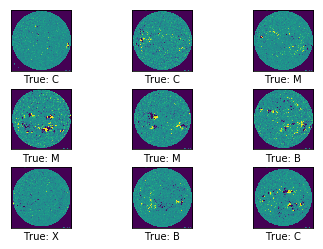

In [51]:
# Get some random images and their labels from the train set.

images, cls_true  = data.train.images, data.train.cls

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [52]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [53]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [54]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [55]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [56]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [57]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [58]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [59]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [60]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [61]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

In [62]:
layer_conv1

<tf.Tensor 'Relu_4:0' shape=(?, 128, 128, 32) dtype=float32>

In [63]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

In [64]:
layer_conv2

<tf.Tensor 'Relu_5:0' shape=(?, 64, 64, 32) dtype=float32>

In [65]:
layer_conv3, weights_conv3 = \
    new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True)

In [66]:
layer_conv3

<tf.Tensor 'Relu_6:0' shape=(?, 32, 32, 64) dtype=float32>

In [67]:
layer_flat, num_features = flatten_layer(layer_conv3)

In [68]:
layer_flat

<tf.Tensor 'Reshape_6:0' shape=(?, 65536) dtype=float32>

In [69]:
num_features

65536

In [70]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

In [71]:
layer_fc1

<tf.Tensor 'Relu_7:0' shape=(?, 128) dtype=float32>

In [72]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [73]:
layer_fc2

<tf.Tensor 'add_9:0' shape=(?, 4) dtype=float32>

In [74]:
y_pred = tf.nn.softmax(layer_fc2)

In [75]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [76]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

In [77]:
cost = tf.reduce_mean(cross_entropy)

In [78]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

In [79]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [80]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [81]:
session = tf.Session()

In [82]:
session.run(tf.initialize_all_variables())

In [83]:
train_batch_size = batch_size

In [84]:
def print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss):
    # Calculate the accuracy on the training-set.
    acc = session.run(accuracy, feed_dict=feed_dict_train)
    val_acc = session.run(accuracy, feed_dict=feed_dict_validate)
    msg = "Epoch {0} --- Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}, Validation Loss: {3:.3f}"
    print(msg.format(epoch + 1, acc, val_acc, val_loss))

In [85]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()
    
    best_val_loss = float("inf")
    patience = 0

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch, _, cls_batch = data.train.next_batch(train_batch_size)
        x_valid_batch, y_valid_batch, _, valid_cls_batch = data.valid.next_batch(train_batch_size)

        # Convert shape from [num examples, rows, columns, depth]
        # to [num examples, flattened image shape]

        x_batch = x_batch.reshape(train_batch_size, img_size_flat)
        x_valid_batch = x_valid_batch.reshape(train_batch_size, img_size_flat)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        
        feed_dict_validate = {x: x_valid_batch,
                              y_true: y_valid_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        

        # Print status at end of each epoch (defined as full pass through training dataset).
        if i % int(data.train.num_examples/batch_size) == 0: 
            val_loss = session.run(cost, feed_dict=feed_dict_validate)
            epoch = int(i / int(data.train.num_examples/batch_size))
            
            print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss)
            
            if early_stopping:    
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience = 0
                else:
                    patience += 1

                if patience == early_stopping:
                    break

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time elapsed: " + str(timedelta(seconds=int(round(time_dif)))))

In [86]:
def plot_example_errors(cls_pred, correct):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.valid.images[incorrect]
    print(cls_pred)
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    print('printing incorrect predictions')
    print(cls_pred)

    print(data.valid.cls)
    # Get the true classes for those images.
    cls_true = data.valid.cls[incorrect]
    print('printing answers for incorrect')
    print(cls_true)
    
    # Plot the first 9 images.
    plot_images(images=images[0:25],
                cls_true=cls_true[0:25],
                cls_pred=cls_pred[0:25])

In [87]:
def plot_confusion_matrix(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.valid.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [88]:
def print_validation_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(data.valid.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_test)
        print('i is')
        print(i)
        print('j is')
        print(j)
        print(data.valid.images.shape)
        print(data.valid.images[i:j, :].shape)
        # Get the images from the test-set between index i and j.
        images = data.valid.images[i:j, :].reshape(batch_size, img_size_flat)
        

        # Get the associated labels.
        labels = data.valid.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    cls_true = np.array(data.valid.cls)
    cls_pred = np.array([classes[x] for x in cls_pred]) 

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [89]:
optimize(num_iterations=1)
print_validation_accuracy()

Epoch 1 --- Training Accuracy:  43.8%, Validation Accuracy:  28.1%, Validation Loss: 4.228
Time elapsed: 0:00:31
i is
0
j is
32
(64, 256, 256)
(32, 256, 256)
i is
32
j is
64
(64, 256, 256)
(32, 256, 256)
Accuracy on Test-Set: 28.1% (18 / 64)


In [90]:
#changed to 9 for now
optimize(num_iterations=99)  # We already performed 1 iteration above.

Epoch 2 --- Training Accuracy:  43.8%, Validation Accuracy:  28.1%, Validation Loss: 1.272
Epoch 3 --- Training Accuracy:  25.0%, Validation Accuracy:  34.4%, Validation Loss: 1.177
Epoch 4 --- Training Accuracy:  25.0%, Validation Accuracy:  37.5%, Validation Loss: 1.263
Epoch 5 --- Training Accuracy:  25.0%, Validation Accuracy:  34.4%, Validation Loss: 1.195
Epoch 6 --- Training Accuracy:  25.0%, Validation Accuracy:  37.5%, Validation Loss: 1.260
Epoch 7 --- Training Accuracy:  25.0%, Validation Accuracy:  34.4%, Validation Loss: 1.185
Epoch 8 --- Training Accuracy:  25.0%, Validation Accuracy:  37.5%, Validation Loss: 1.260
Time elapsed: 0:18:11


i is
0
j is
32
(64, 256, 256)
(32, 256, 256)
i is
32
j is
64
(64, 256, 256)
(32, 256, 256)
Accuracy on Test-Set: 35.9% (23 / 64)
Example errors:
['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
printing incorrect predictions
['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C']
['B' 'M' 'M' 'M' 'C' 'C' 'C' 'M' 'C' 'M' 'C' 'M' 'C' 'B' 'B' 'C' 'B' 'M'
 'C' 'C' 'M' 'C' 'M' 'B' 'M' 'B' 'M' 'C' 'B' 'B' 'M' 'B' 'C' 'B' 'C' 'C'
 'C' 'B' 'M' 'C' 'M' 'M' 'M' 'B' 'B' 'X' 'B' 'B' 'C' 'B' 'M' 'B' 'C' 'M'
 'M' 'C' 'C' 'B' 'C' 'X' 'C' 'M' 'C' 'M']
printing answers for incorrect
['B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'M' '

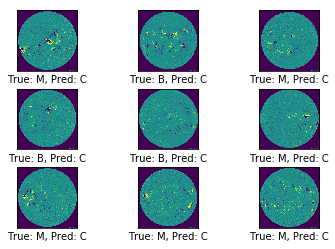

In [91]:
print_validation_accuracy(show_example_errors=True)

In [92]:
session.close()